In [4]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

### First read in the data.  
The sample dataset was downloaded from Kaggle at https://www.kaggle.com/the-guardian/olympic-games
I then unzipped the file which created the threee files in the olympic-games directory:

| filename | description |
| -------- | ----------- |
|olympic-games/dictionary.csv|Infomation on each country|
|olympic-games/summer.csv|Summer Olympic results|
|olympic-games/winter.csv|Winter Olympic results}

In [5]:
dictionary = pd.read_csv("./olympic-games/dictionary.csv")
dictionary.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [6]:
summer = pd.read_csv("./olympic-games/summer.csv")
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [7]:
winter = pd.read_csv("./olympic-games/winter.csv")
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


### First task:
1. Find out the (male and female) athlete who won most medals in all the Summer Olympic Games (1896-2014). The answer will be Michael Phelps for the men and Larisa Latynina for the women.

In [8]:
from collections import Counter
summer_male_results = summer.loc[summer['Gender'] == 'Men']
name_counter = Counter(summer_male_results.Athlete)
top_male_athlete = name_counter.most_common(1)[0]
summer_female_results = summer.loc[summer['Gender'] == 'Women']
name_counter = Counter(summer_female_results.Athlete)
top_female_athlete = name_counter.most_common(1)[0]
print(f'Athlete(s) with most medals')
print(f'    male   = {top_male_athlete[0]} (total of {top_male_athlete[1]} medals)')
print(f'    female = {top_female_athlete[0]} (total of {top_female_athlete[1]} medals)')

Athlete(s) with most medals
    male   = PHELPS, Michael (total of 22 medals)
    female = LATYNINA, Larisa (total of 18 medals)


### Second task:
2. Display the first 10 countries that won most medals:
  - The order for men will be: USA, RUS, GBR, GER, FRA, ITA, SWE, HUN, AUS, JPN
  - The order for women will be: USA, RUS, GER, CHN, AUS, NED, ROU, GBR, JPN, HUN

In [9]:
# First build a complete DataFrame that includes both summer and winter results but only the Country 
# and Gender columns
country_gender = summer[['Country', 'Gender']]
country_gender = country_gender.append(winter[['Country', 'Gender']])
print(f'summer count = {len(summer)}, winter count = {len(winter)}, total count = {len(country_gender)}')

summer count = 31165, winter count = 5770, total count = 36935


In [10]:
# Find all the records for Men:
men = country_gender.loc[country_gender['Gender'] == 'Men']
# Create a tuple value for each Country,Gender and count them
men_counter = Counter(men.apply(tuple, axis=1))
# Show the top 10
men_counter.most_common(10)

[(('USA', 'Men'), 3618),
 (('URS', 'Men'), 1807),
 (('GBR', 'Men'), 1470),
 (('FRA', 'Men'), 1351),
 (('ITA', 'Men'), 1292),
 (('SWE', 'Men'), 1280),
 (('GER', 'Men'), 1119),
 (('HUN', 'Men'), 840),
 (('CAN', 'Men'), 814),
 (('NOR', 'Men'), 791)]

In [11]:
women = country_gender.loc[country_gender['Gender'] == 'Women']
women_counter = Counter(women.apply(tuple, axis=1))
women_counter.most_common(10)

[(('USA', 'Women'), 1620),
 (('URS', 'Women'), 682),
 (('CHN', 'Women'), 591),
 (('GER', 'Women'), 546),
 (('AUS', 'Women'), 500),
 (('RUS', 'Women'), 465),
 (('CAN', 'Women'), 460),
 (('GDR', 'Women'), 423),
 (('NED', 'Women'), 399),
 (('ROU', 'Women'), 335)]

In [12]:
# Top 10 men should be USA, RUS, GBR, GER, FRA, ITA, SWE, HUN, AUS, JPN
[(t[0][0], t[1]) for t in men_counter.most_common(10)]

[('USA', 3618),
 ('URS', 1807),
 ('GBR', 1470),
 ('FRA', 1351),
 ('ITA', 1292),
 ('SWE', 1280),
 ('GER', 1119),
 ('HUN', 840),
 ('CAN', 814),
 ('NOR', 791)]

In [13]:
# Top 10 women should be USA, RUS, GER, CHN, AUS, NED, ROU, GBR, JPN, HUN
[(t[0][0], t[1]) for t in women_counter.most_common(10)]

[('USA', 1620),
 ('URS', 682),
 ('CHN', 591),
 ('GER', 546),
 ('AUS', 500),
 ('RUS', 465),
 ('CAN', 460),
 ('GDR', 423),
 ('NED', 399),
 ('ROU', 335)]

In [14]:
# Could also use the native value_counts() function on Series to get the same result:
men.apply(tuple, axis=1).value_counts()[:10]

(USA, Men)    3618
(URS, Men)    1807
(GBR, Men)    1470
(FRA, Men)    1351
(ITA, Men)    1292
(SWE, Men)    1280
(GER, Men)    1119
(HUN, Men)     840
(CAN, Men)     814
(NOR, Men)     791
dtype: int64

In [15]:
# Ditto for the women
women.apply(tuple, axis=1).value_counts()[:10]

(USA, Women)    1620
(URS, Women)     682
(CHN, Women)     591
(GER, Women)     546
(AUS, Women)     500
(RUS, Women)     465
(CAN, Women)     460
(GDR, Women)     423
(NED, Women)     399
(ROU, Women)     335
dtype: int64

### Third task:
3. Use matplotlib to build line plots of the 10 most awarded countries for time span 1896-2012. Use the 10 most popular summer Olympics disciplines where most popular you can define yourself.

In [16]:
# First find the top 10 disciplines:
all_disciplines = summer['Discipline']
# Then count the values and get the top 10.  Turn the resulting
# Series into a simple array of strings
top_disciplines = [d for d in all_disciplines.value_counts()[:10].index]
top_disciplines

['Athletics',
 'Rowing',
 'Swimming',
 'Artistic G.',
 'Fencing',
 'Football',
 'Hockey',
 'Shooting',
 'Sailing',
 'Basketball']

In [17]:
# Filter the dataset to only include results for the top 10 disciplines
filtered_results = summer.loc[summer['Discipline'].isin(top_disciplines)]
len(filtered_results)                                                                        

18839

In [18]:
# Then find the top 10 countries within the filtered dataset
top_ten_countries = [d for d in filtered_results['Country'].value_counts()[:10].index]
top_ten_countries

['USA', 'URS', 'GBR', 'AUS', 'ITA', 'FRA', 'GER', 'GDR', 'SWE', 'NED']

In [19]:
# Now filter the results again to only include results for the top 10 countries
filtered_results = filtered_results.loc[filtered_results['Country'].isin(top_ten_countries)]
len(filtered_results)

10727

In [20]:
# Use describe just to make sure we now only have 10 distinct valued for Country:
filtered_results['Country'].describe()

count     10727
unique       10
top         USA
freq       3280
Name: Country, dtype: object

In [25]:
filtered_results['Country'].value_counts()

USA    3280
URS    1259
GBR    1095
AUS     867
ITA     810
FRA     785
GER     779
GDR     628
SWE     613
NED     611
Name: Country, dtype: int64

<IPython.core.display.Javascript object>


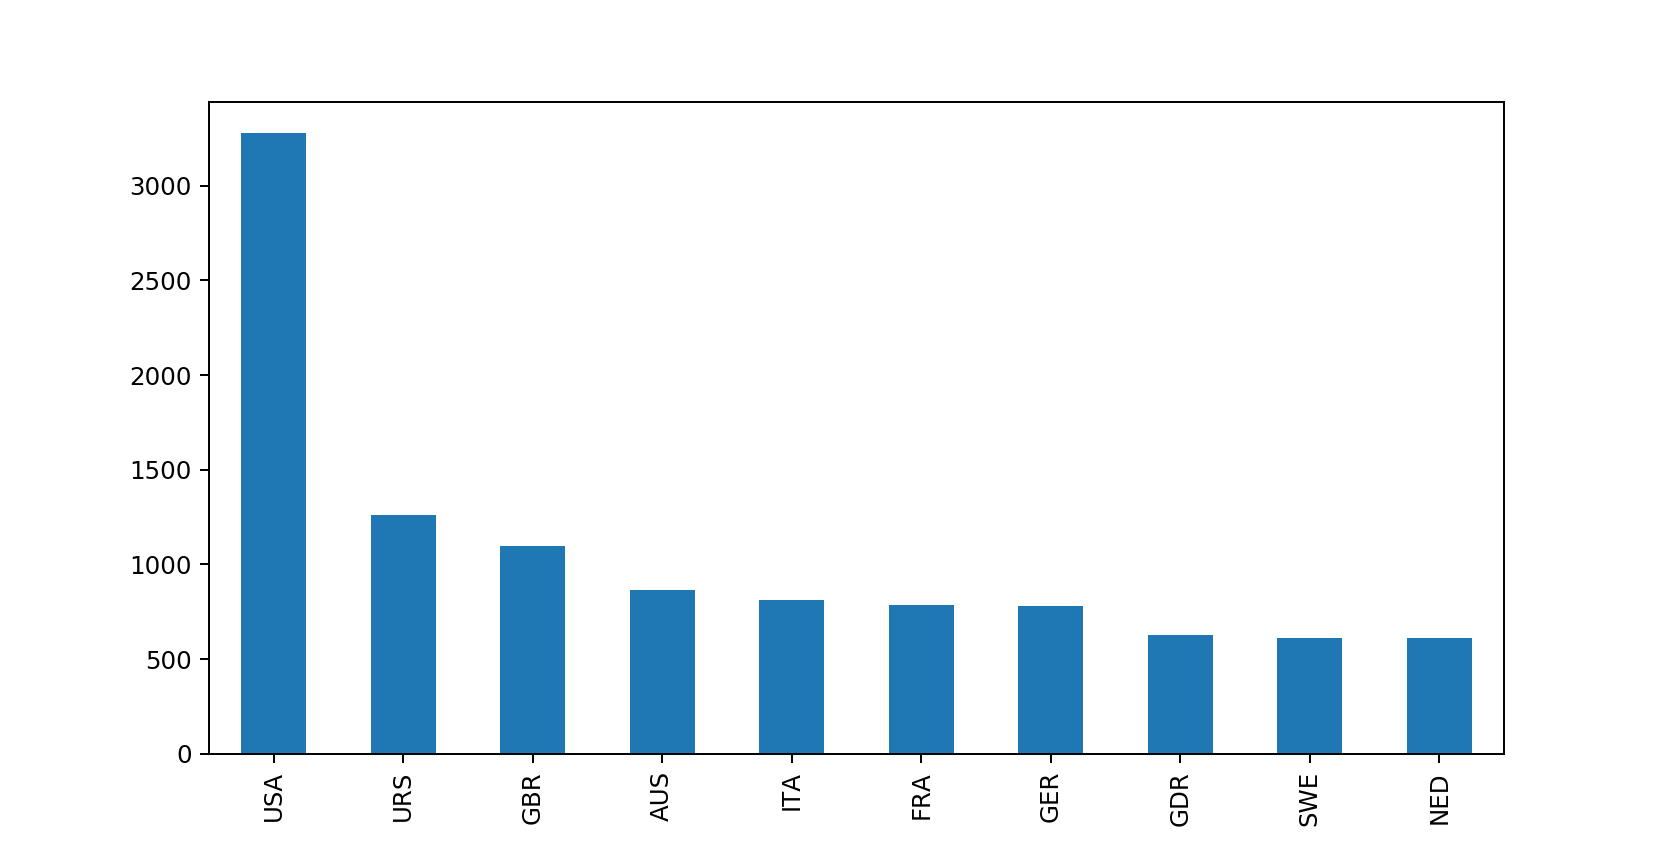

In [28]:
 filtered_results['Country'].value_counts().plot(kind='bar')